In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
df = pd.read_csv("data/stud.csv")

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

In [21]:
df.shape

(1000, 8)

In [22]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [23]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [25]:
df.nunique()
## all unique items

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [26]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [45]:
print("Types of Genders include ", df['gender'].unique().size, df['gender'].unique())
print("Types of Races include ", df['race_ethnicity'].unique().size, df['race_ethnicity'].unique())
print("Types of parental_level_of_education include ", df['parental_level_of_education'].unique().size, df['parental_level_of_education'].unique())
print("Types of lunch include ", df['lunch'].unique().size, df['lunch'].unique())
print("Types of test_preparation_course include ", df['test_preparation_course'].unique().size, df['test_preparation_course'].unique())

Types of Genders include  2 ['female' 'male']
Types of Races include  5 ['group B' 'group C' 'group A' 'group D' 'group E']
Types of parental_level_of_education include  6 ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Types of lunch include  2 ['standard' 'free/reduced']
Types of test_preparation_course include  2 ['none' 'completed']


In [56]:
numerical = [feature for feature in df.columns if df[feature].dtype !='O']
categorical = [feature for feature in df.columns if df[feature].dtype =='O']

print('{} numerical features {}'.format(len(numerical),numerical))
print('{} categorical features {}'.format(len(categorical),categorical))

3 numerical features ['math_score', 'reading_score', 'writing_score']
5 categorical features ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [58]:
df['Total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['Average_score'] = df['Total_score']/3

In [66]:
math_full = df[df['math_score']==100]['Average_score'].count()
reading_full = df[df['reading_score']==100]['Average_score'].count()
writing_full = df[df['writing_score']==100]['Average_score'].count()

print("full marks in maths {}".format(math_full))
print("full marks in reading {}".format(reading_full))
print("full marks in writing {}".format(writing_full))

full marks in maths 7
full marks in reading 17
full marks in writing 14


In [67]:
math_fail = df[df['math_score']<=20]['Average_score'].count()
reading_fail = df[df['reading_score']<=20]['Average_score'].count()
writing_fail = df[df['writing_score']<=20]['Average_score'].count()

print("failed in maths {}".format(math_fail))
print("failed in reading {}".format(reading_fail))
print("failed in writing {}".format(writing_fail))

failed in maths 4
failed in reading 1
failed in writing 3


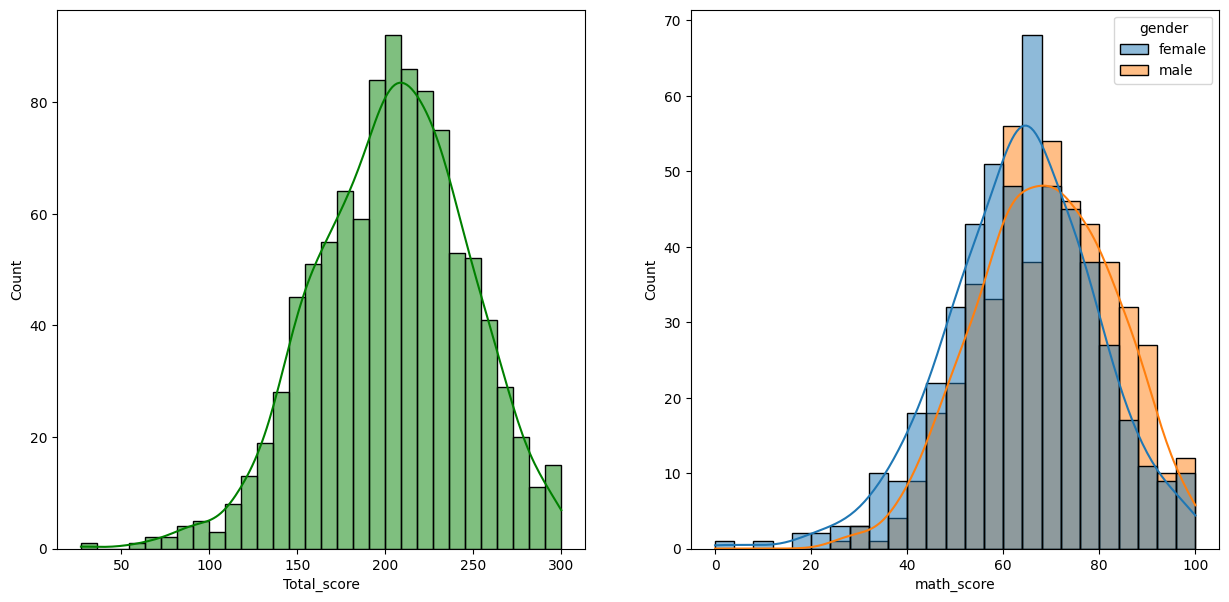

In [92]:
fig,axis = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='Total_score',bins=30,kde=True,color='g')
plt.subplot(1,2,2)
sns.histplot(data=df,x='math_score',kde=True,hue='gender')
plt.show()

The Boys performed better in maths


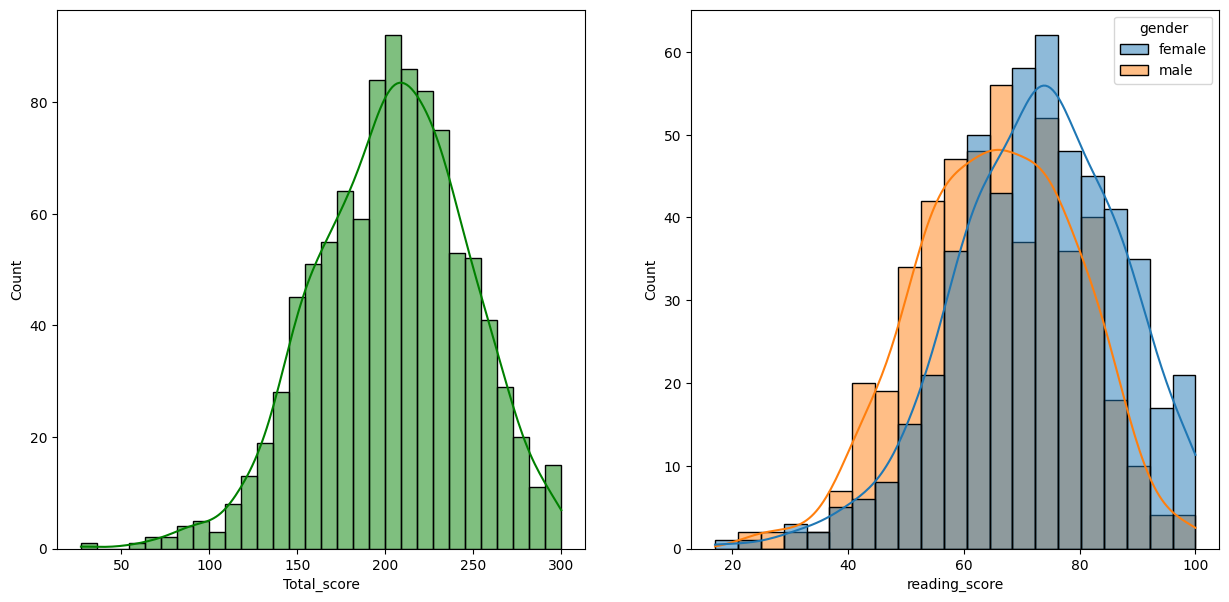

In [94]:
fig,axis = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='Total_score',bins=30,kde=True,color='g')
plt.subplot(1,2,2)
sns.histplot(data=df,x='reading_score',kde=True,hue='gender')
plt.show()

Girls performed better in reading and writing compared to boys